# Woche 10: Datenanalyse-Beispiele: Bundesliga-Datensatz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 0

Autosave disabled


### Daten einlesen und erster Überblick

In [5]:
df = pd.read_csv('../../weitere_Daten/Bundesliga.csv',
                parse_dates=['Datum'])
df.head()

,Unnamed: 0,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore.Heim,Tore.Gast,Tore.Heim.Halbzeit,Tore.Gast.Halbzeit
0,1,1963/1964,1,1963-08-24,17:00,Hertha BSC Berlin,1. FC Nuernberg,1,1,0.0,1.0
1,2,1963/1964,1,1963-08-24,17:00,SV Werder Bremen,Borussia Dortmund,3,2,1.0,1.0
2,3,1963/1964,1,1963-08-24,17:00,Eintracht Frankfurt,1. FC Kaiserslautern,1,1,1.0,1.0
3,4,1963/1964,1,1963-08-24,17:00,Karlsruher SC,Meidericher SV,1,4,0.0,3.0
4,5,1963/1964,1,1963-08-24,17:00,TSV 1860 Muenchen,Eintracht Braunschweig,1,1,1.0,0.0


In [6]:
df.dtypes

Unnamed: 0                     int64
Saison                        object
Spieltag                       int64
Datum                 datetime64[ns]
Anpfiff                       object
Heim                          object
Gast                          object
Tore.Heim                      int64
Tore.Gast                      int64
Tore.Heim.Halbzeit           float64
Tore.Gast.Halbzeit           float64
dtype: object

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df.columns = df.columns.str.replace('.', '_')

<ipython-input-11-4c4625128063>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '_')


In [12]:
df.head()

,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit
0,1963/1964,1,1963-08-24,17:00,Hertha BSC Berlin,1. FC Nuernberg,1,1,0.0,1.0
1,1963/1964,1,1963-08-24,17:00,SV Werder Bremen,Borussia Dortmund,3,2,1.0,1.0
2,1963/1964,1,1963-08-24,17:00,Eintracht Frankfurt,1. FC Kaiserslautern,1,1,1.0,1.0
3,1963/1964,1,1963-08-24,17:00,Karlsruher SC,Meidericher SV,1,4,0.0,3.0
4,1963/1964,1,1963-08-24,17:00,TSV 1860 Muenchen,Eintracht Braunschweig,1,1,1.0,0.0


In [13]:
df.shape

(13406, 10)

In [17]:
df.isnull().sum()

Saison                0
Spieltag              0
Datum                 0
Anpfiff               0
Heim                  0
Gast                  0
Tore_Heim             0
Tore_Gast             0
Tore_Heim_Halbzeit    4
Tore_Gast_Halbzeit    4
dtype: int64

In [21]:
df[df.isnull().any(axis=1)]

,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit
2252,1970/1971,27,1971-04-03,15:30,Borussia Moenchengladbach,SV Werder Bremen,0,2,NaN,NaN
3980,1976/1977,15,1976-11-27,15:30,1. FC Kaiserslautern,Fortuna Duesseldorf,0,2,NaN,NaN
9103,1992/1993,32,1993-05-22,15:30,KFC Uerdingen 05,Eintracht Frankfurt,2,0,NaN,NaN
9661,1994/1995,26,1995-04-15,15:30,Eintracht Frankfurt,FC Bayern Muenchen,2,0,NaN,NaN


In [22]:
df.describe()

,Spieltag,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit
count,13406.000000,13406.000000,13406.000000,13402.000000,13402.000000
mean,17.485081,1.907877,1.191183,0.833085,0.514774
std,9.819879,1.472291,1.157593,0.917930,0.714929
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000
50%,17.000000,2.000000,1.000000,1.000000,0.000000
75%,26.000000,3.000000,2.000000,1.000000,1.000000
max,38.000000,12.000000,9.000000,6.000000,6.000000


In [27]:
# Heim- versus Gast-Toreverteilung
tabHeim = df.Tore_Heim.value_counts()
tabGast = df.Tore_Gast.value_counts()
tab = pd.concat([tabHeim, tabGast], axis=1)
tab

,Tore_Heim,Tore_Gast
0,2244,4287.0
1,3743,4745.0
2,3385,2704.0
3,2201,1113.0
4,1109,397.0
5,458,98.0
6,178,43.0
7,62,14.0
8,12,2.0
9,8,3.0


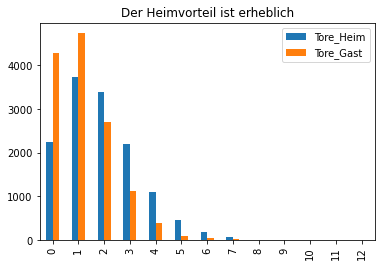

In [29]:
tab.plot.bar(title='Der Heimvorteil ist erheblich');

### Neue Variablen definieren:

In [30]:
df['Tore'] = df.Tore_Heim + df.Tore_Gast
df['Tore_erste_Halbzeit'] = df.Tore_Heim_Halbzeit + df.Tore_Gast_Halbzeit
df['Tore_zweite_Halbzeit'] = df.Tore - df.Tore_erste_Halbzeit

In [32]:
df.iloc[0]

Saison                            1963/1964
Spieltag                                  1
Datum                   1963-08-24 00:00:00
Anpfiff                               17:00
Heim                      Hertha BSC Berlin
Gast                        1. FC Nuernberg
Tore_Heim                                 1
Tore_Gast                                 1
Tore_Heim_Halbzeit                      0.0
Tore_Gast_Halbzeit                      1.0
Tore                                      2
Tore_erste_Halbzeit                     1.0
Tore_zweite_Halbzeit                    1.0
Name: 0, dtype: object

In [37]:
# Anzahl Spiele pro Saison (Häufigkeitstabelle)
SpieleSaison = df.Saison.value_counts()
SpieleSaison.head()

1991/1992    380
1979/1980    306
1983/1984    306
1986/1987    306
2006/2007    306
Name: Saison, dtype: int64

Meistens werden 306 Spiele pro Saison ausgetragen. Wie viele Manschaften impliziert dies? (Jede Manschaft spielt gegen alle anderen einmal zu Hause und einmal auswärts!)

$$18\cdot17=306$$
Üblicherweise spielen 18 Mannschaften in der Bundesliga.

In [40]:
SpieleSaison[SpieleSaison != 306]

1991/1992    380
1964/1965    240
1963/1964    240
Name: Saison, dtype: int64

### Einige Auswertungen

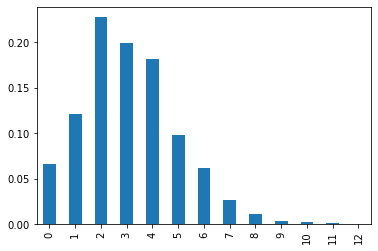

In [45]:
df.Tore.value_counts(normalize=True).sort_index().plot.bar();

Welches waren die torreichsten Spiele?

In [46]:
df[df.Tore == df.Tore.max()]

,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit,Tore,Tore_erste_Halbzeit,Tore_zweite_Halbzeit
86,1963/1964,11,1963-11-16,17:30,Borussia Dortmund,1. FC Kaiserslautern,9,3,5.0,1.0,12,6.0,6.0
2458,1971/1972,16,1971-11-27,15:30,FC Bayern Muenchen,Borussia Dortmund,11,1,4.0,0.0,12,4.0,8.0
4048,1976/1977,23,1977-02-26,15:30,1. FC Koeln,Tennis Borussia Berlin,8,4,4.0,2.0,12,6.0,6.0
4454,1977/1978,34,1978-04-29,15:30,Borussia Moenchengladbach,Borussia Dortmund,12,0,6.0,0.0,12,6.0,6.0
5785,1982/1983,12,1982-11-06,15:30,Borussia Dortmund,Arminia Bielefeld,11,1,1.0,1.0,12,2.0,10.0


Wie ist hat sich die durchschnittlich Anzahl Tore pro Spiel über die Saisons verändert?

In [47]:
ToreSaison = df.groupby('Saison').Tore.mean()
ToreSaison.head()

Saison
1963/1964    3.570833
1964/1965    3.316667
1965/1966    3.225490
1966/1967    2.924837
1967/1968    3.245098
Name: Tore, dtype: float64

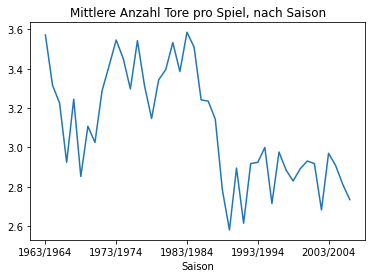

In [49]:
ToreSaison.plot(title='Mittlere Anzahl Tore pro Spiel, nach Saison');

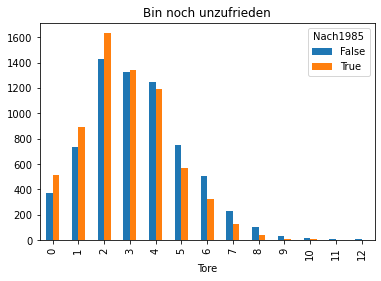

In [63]:
# Toreverteilung in drei ausgewählten Saisons:
df['Nach1985'] = df.Datum.dt.year > 1985
tab = pd.crosstab(df.Tore, df.Nach1985)
tab.plot.bar(title='Bin noch unzufrieden');

### Gemeinsame Häufigkeiten bezüglich Tore in der ersten und zweiten Halbzeit

In [67]:
pd.crosstab(df.Tore_erste_Halbzeit>0, 
            df.Tore_zweite_Halbzeit>0, 
            normalize=True, margins=True).round(2)

Tore_zweite_Halbzeit,False,True,All
Tore_erste_Halbzeit,,,
False,0.07,0.20,0.26
True,0.12,0.62,0.74
All,0.18,0.82,1.00


### Nun die bedingte Verteilung (Bedingung auf erste Halbzeit)

In [68]:
pd.crosstab(df.Tore_erste_Halbzeit>0, 
            df.Tore_zweite_Halbzeit>0, 
            normalize='index', margins=True).round(2)

Tore_zweite_Halbzeit,False,True
Tore_erste_Halbzeit,,
False,0.25,0.75
True,0.16,0.84
All,0.18,0.82


### Wie viele Spiele wurden vom Heimteam (1), Gastteam (2) oder keinem (0) gewonnen?

In [69]:
df['Gewonnen'] = np.select([df.Tore_Heim > df.Tore_Gast,
                            df.Tore_Heim < df.Tore_Gast],
                            [1, 2], default=0)
df.head()
# Alternativ mit verschachteltem np.where()

,Saison,Spieltag,Datum,Anpfiff,Heim,Gast,Tore_Heim,Tore_Gast,Tore_Heim_Halbzeit,Tore_Gast_Halbzeit,Tore,Tore_erste_Halbzeit,Tore_zweite_Halbzeit,Nach1985,Gewonnen
0,1963/1964,1,1963-08-24,17:00,Hertha BSC Berlin,1. FC Nuernberg,1,1,0.0,1.0,2,1.0,1.0,False,0
1,1963/1964,1,1963-08-24,17:00,SV Werder Bremen,Borussia Dortmund,3,2,1.0,1.0,5,2.0,3.0,False,1
2,1963/1964,1,1963-08-24,17:00,Eintracht Frankfurt,1. FC Kaiserslautern,1,1,1.0,1.0,2,2.0,0.0,False,0
3,1963/1964,1,1963-08-24,17:00,Karlsruher SC,Meidericher SV,1,4,0.0,3.0,5,3.0,2.0,False,2
4,1963/1964,1,1963-08-24,17:00,TSV 1860 Muenchen,Eintracht Braunschweig,1,1,1.0,0.0,2,1.0,1.0,False,0


In [70]:
df.Gewonnen.value_counts(normalize=True)

1    0.521483
0    0.259734
2    0.218783
Name: Gewonnen, dtype: float64

Welche und wie viele Mannschaften haben in den untersuchten Saisons gespielt?

In [77]:
Teams = df.Heim.append(df.Gast)
Teams.unique()

array(['Hertha BSC Berlin', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'Karlsruher SC', 'TSV 1860 Muenchen', 'Preussen Muenster',
       '1. FC Saarbruecken', 'FC Schalke 04', 'Eintracht Braunschweig',
       'Borussia Dortmund', 'Meidericher SV', 'Hamburger SV',
       '1. FC Kaiserslautern', '1. FC Koeln', '1. FC Nuernberg',
       'VfB Stuttgart', 'Hannover 96', 'Borussia Neunkirchen',
       'Tasmania 1900 Berlin', 'Borussia Moenchengladbach',
       'FC Bayern Muenchen', 'MSV Duisburg', 'Fortuna Duesseldorf',
       'Rot-Weiss Essen', 'Alemannia Aachen', 'Kickers Offenbach',
       'Rot-Weiss Oberhausen', 'Arminia Bielefeld', 'VfL Bochum',
       'Wuppertaler SV', 'Fortuna Koeln', 'Tennis Borussia Berlin',
       'KFC Uerdingen 05', 'FC St. Pauli', 'Darmstadt 98',
       'Bayer Leverkusen', 'SV Waldhof Mannheim', 'FC 08 Homburg',
       'Blau-Weiss 90 Berlin', 'Stuttgarter Kickers',
       'SG Wattenscheid 09', 'Dynamo Dresden', 'Hansa Rostock',
       'VfB Leipzig', 'SC Fr

In [78]:
Teams.nunique()

50

Welche drei Mannschaften haben die meisten Spiele in den untersuchten Saisons?

In [81]:
Teams.value_counts()[:3]

Hamburger SV          1492
SV Werder Bremen      1458
FC Bayern Muenchen    1432
dtype: int64